This notebook shows you how to use Pandas from Python to explore epidemic data. We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

Author: Damiaan Zwietering


__I'm not an epidemiologist or a virologist and just exploring data, so I will not draw conclusions on that level nor base behavior or policy upon these explorations and _neither should you_. Even within a country the data is heavily biased, not in the least because of testing and measurement policies changing over time!__

Let's define the primary (your?) country and a reference country

In [38]:
primary_country = 'DE'
reference_country = 'CN'

Get Pandas and NumPy for feature engineering and calculations and get our plots inline.

In [17]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe `df` directly from the previous etl step

In [37]:
import pickle
df_pivot = pickle.load(open("cases_pivot.pickle","rb"))
df_pivot

cases                                                        ...  \
geoId         AD     AE     AF   AG   AI    AL    AM   AO     AR    AT  ...   
dateRep                                                                 ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN   0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN   0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN   0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN   0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN   0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...   ...  ...    ...   ...  ...   
2020-04-24   1.0  518.0  105.0  0.0  0.0  29.0  73.0  1.0  147.0  61.0  ...   
2020-04-25   7.0  525.0   70.0  0.0  0.0  15.0  81.0  0.0    0.0  83.0  ...   
2020-04-26   2.0  532.0  112.0  0.0  0.0  34.0  69.0  0.0  344.0  66.0  ...   
2020-04-27   7.0  536.0   68.0  0.0  0.0  14.0  62.0  1.0    0.0  55.0  ...   
2020-04-28   3.0  490.0  172.0  0.0  0.0  10.0  59.0  1.0  223.0  67.0  ...   

           deaths                                                
geoId          VC   VE   VG   VI   VN   XK   YE    ZA   ZM   ZW  
dateRep                                                          
2019-12-31    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-01    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-02    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-03    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-04    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  
2020-04-24    0.0  0.0  0.0  0.0  0.0  1.0  0.0  10.0  0.0  0.0  
2020-04-25    0.0  0.0  0.0  0.0  0.0  0.0  0.0   4.0  0.0  1.0  
2020-04-26    0.0  0.0  0.0  0.0  0.0  1.0  0.0   7.0  0.0  0.0  
2020-04-27    0.0  0.0  0.0  0.0  0.0  1.0  0.0   1.0  0.0  0.0  
2020-04-28    0.0  0.0  0.0  1.0  0.0  1.0  0.0   3.0  0.0  0.0  

[120 rows x 412 columns]

Get to know your data by visualization, in this case the number of new `cases` per day for the primary_country.

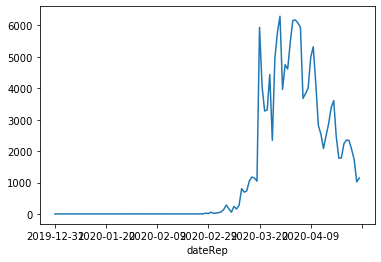

In [39]:
df_pivot['cases'][primary_country].plot()

Because of the pivoted data format it is just as easy to look at the number of `deaths`.

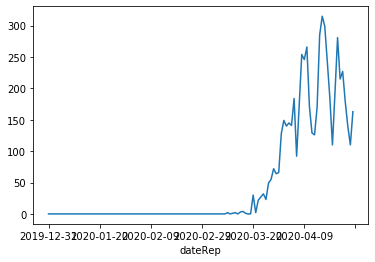

In [40]:
df_pivot['deaths'][primary_country].plot()

What would the reference country country look like?

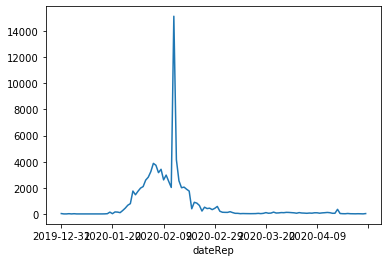

In [41]:
df_pivot['cases'][reference_country].plot()

After these selection examples we'll try some more advanced exploration. To see the growth in number of cases, we use a cumulative sum with `cumsum`, in this case we show the primary and reference country.

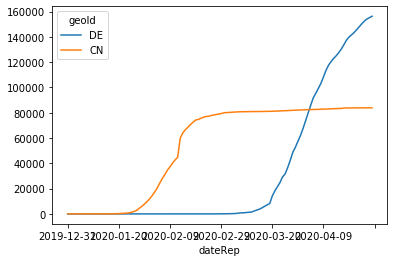

In [42]:
df_pivot['cases'][[primary_country, reference_country]].cumsum().plot()

Because of the large difference in numbers, it may help to use a logarithmic scale. We can change the data passed to the plot using the `log10` function from NumPy. This will generate some warnings because `cases` can be zero.

/Users/romeokienzler/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


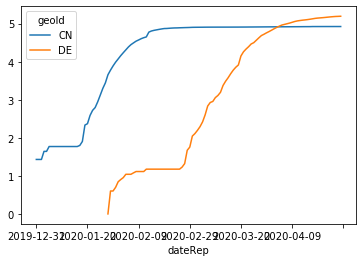

In [44]:
np.log10(df_pivot['cases'][[reference_country, primary_country]].cumsum()).plot()

Alternatively, we ask `plot` to use a logarithmic scale, Chine vs. Netherlands.

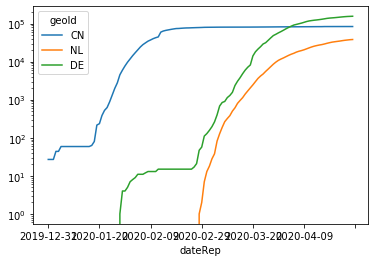

In [49]:
df_pivot['cases'][['CN', 'NL', 'DE']].cumsum().plot(logy=True)

This clearly shows the phases in __CN__, first some external infections, then an incubation period, then the internal infections take off. Measures like isolation and social distancing seem to work, the curve flattens and stabilizes. For __NL__ we see measures take effect. Also, no real startup curve here. Interestingly, we see it in Germany.

Perhaps some other countries also show this effect, have a look at your own country!

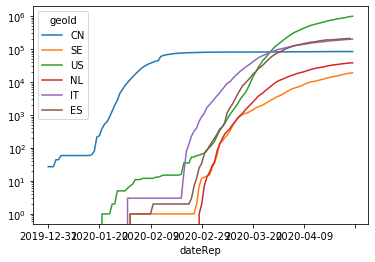

In [51]:
df_pivot['cases'][['CN', 'SE', 'US', 'NL', 'IT', 'ES']].cumsum().plot(logy=True)

Another often used measure is relative growth in total number of cases per day. Therefore we need to divide the current day by the previous one, easily implemented by dividing the dataframe by the same dataframe shifted one row. Note that we are now only showing data from March 16 onwards, as specified by the `loc` method.

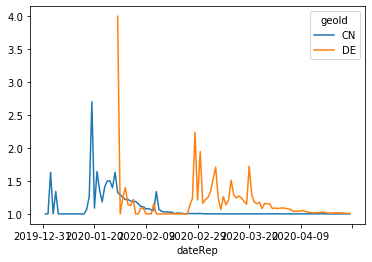

In [54]:
(df_pivot.cumsum() / df_pivot.shift().cumsum())['cases'][[reference_country, primary_country]].plot()

From this factor (relative increase in cases since yesterday) we can calculate the number of days to double the total amount of cases by some logarithmic magic. For __NL__ the number doubled every one or two days in the beginning but now it doubles in over 14 days, which is a good sign (more about these 14 days later on). If this number keeps rising we will never get to the point where it doubles again.

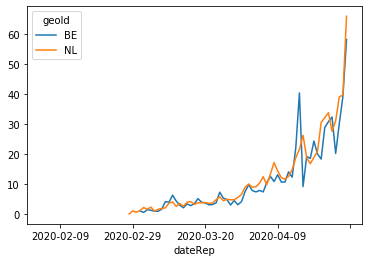

In [58]:
(np.log10(2) / np.log10(df_pivot.cumsum() / df_pivot.shift().cumsum()))['cases'][['BE', 'NL']].plot()

Rolling window functions can be used to smooth a curve, in this case the `rolling` 7 day `mean` new cases for __BE__ and __NL__.

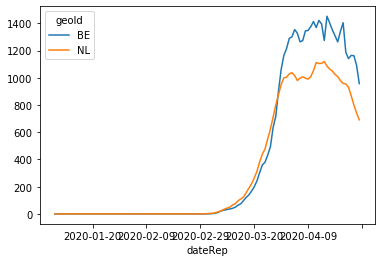

In [61]:
df_pivot['cases'][['BE', 'NL']].rolling(7).mean().plot()

The default window function is a rectangle (called `boxcar`), where all values are weighed equally. Using another window function will weigh the values in the window differently, such as a gaussian function which will focus more on the recent values in the window, with a specified standard deviation as `std` in the `mean` aggregate function.

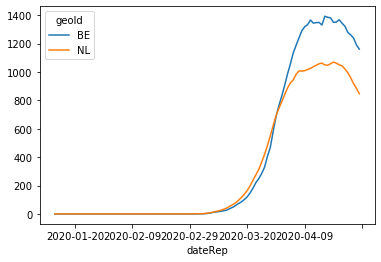

In [63]:
df_pivot['cases'][['BE', 'NL']].rolling(14, win_type='gaussian').mean(std=7).plot()

Now let's have a look at _the curve_ which we are supposed to flatten, to prevent overload on our healthcare system. It shows the number of active cases (the _infected_ category in the SIR model). We assume that an infection lasts 14 days on average (which is under discussion, currently the last 14 days is used by EU CDC but other studies suggest 18 days), so we only look at new cases from the last 14 days. By leaving out older infections (the _removed_ category in SIR) this shows us the current number of active infections. China is clearly through their (first) curve. Italy and Spain seem to be over the top and so is France. We use a `sum` function to aggregate cases over the 14 day window.

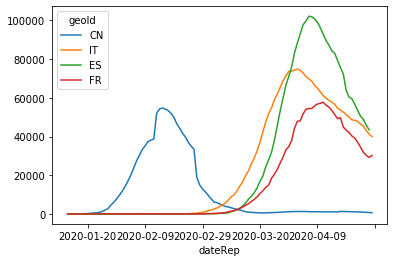

In [64]:
df_pivot['cases'][['CN', 'IT', 'ES', 'FR']].rolling(14).sum().plot()

Assuming that we see about 8% of currently infected in Intensive Care, we can monitor the necessary capacity with the following graph.

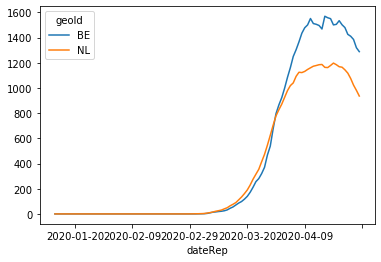

In [66]:
(df_pivot['cases'][['BE', 'NL']].rolling(14).sum() * 0.08).plot()

For __NL__ this more or less corresponds with the official ICU data. We don't clearly see the published drop in number of current patients yet, that is probably offset by an increase in testing, so we may have to gradually lower the percentage.

In [68]:
(df_pivot['cases'][['BE', 'NL']].rolling(14).sum() * 0.08).tail(14)

geoId,BE,NL
dateRep,,
2020-04-15,1467.52,1185.92
2020-04-16,1568.72,1163.12
2020-04-17,1556.88,1161.36
2020-04-18,1549.44,1178.08
2020-04-19,1500.16,1196.96
2020-04-20,1504.40,1184.32
2020-04-21,1533.52,1168.16
2020-04-22,1500.96,1164.32
2020-04-23,1478.88,1143.44


The structure of our dataframe lends itself to exploring all kinds of other measures. What about infection rate? The example below gives the average number of cases for last week divided by the infectious cases a week before, a proxy for the infamous `R` measure.

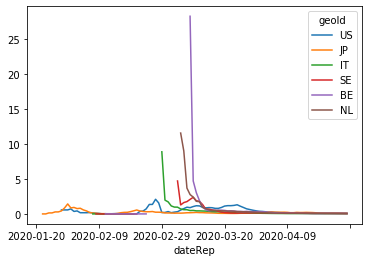

In [71]:
(df_pivot.rolling(7).mean() / df_pivot.shift(7).rolling(14).sum())['cases'][['US', 'JP', 'IT', 'SE', 'BE', 'NL']].plot()

Or what about the number of deaths in the week before as part of the number of active cases in the week before that? In other words, an estimate of the death rate _for known cases_, heavily depending on the testing and recording policies so in no way comparable across countries or even within a country over time.

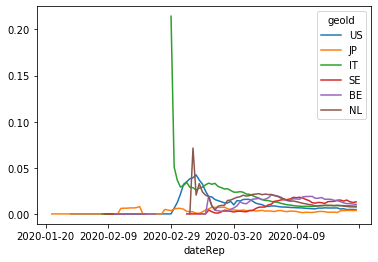

In [72]:
(df_pivot.rolling(7).mean()['deaths'] / df_pivot.shift(7).rolling(14).sum()['cases'])[['US', 'JP', 'IT', 'SE', 'BE', 'NL']].plot()

Instead of plotting you can also use aggregate functions at the end, such as `mean`. Again, a lot of information about the underlying assumptions and policies would be needed to interpret these numbers correctly.

In [73]:
(df_pivot.rolling(7).mean()['deaths'] / df_pivot.shift(7).rolling(14).sum()['cases'])[['US', 'JP', 'IT', 'SE', 'BE', 'NL']].mean()

geoId
US    0.008323
JP    0.002720
IT         inf
SE    0.006930
BE    0.010084
NL    0.015242
dtype: float64

Keep exploring! Stay home, wash your hands, keep your distance.